## 1. Introduction to Random Forest algorithm 


#### Random forest is a supervised learning algorithm. It has two variations – one is used for classification problems and other is used for regression problems. It is one of the most flexible and easy to use algorithm. It creates decision trees on the given data samples, gets prediction from each tree and selects the best solution by means of voting. It is also a pretty good indicator of feature importance.

#### Random forest algorithm combines multiple decision-trees, resulting in a forest of trees, hence the name Random Forest. In the random forest classifier, the higher the number of trees in the forest results in higher accuracy.

## 2. Random Forest algorithm intuition 
#### Table of Contents

#### Random forest algorithm intuition can be divided into two stages.

#### In the first stage, we randomly select “k” features out of total m features and build the random forest. In the first stage, we proceed as follows:-

#### Randomly select k features from a total of m features where k < m.
#### Among the k features, calculate the node d using the best split point.
#### Split the node into daughter nodes using the best split.
#### Repeat 1 to 3 steps until l number of nodes has been reached.
#### Build forest by repeating steps 1 to 4 for n number of times to create n number of trees.
#### In the second stage, we make predictions using the trained random forest algorithm.

#### We take the test features and use the rules of each randomly created decision tree to predict the outcome and stores the predicted outcome.
#### Then, we calculate the votes for each predicted target.
#### Finally, we consider the high voted predicted target as the final prediction from the random forest algorithm.

## 3. Advantages and disadvantages of Random Forest algorithm 
Table of Contents

The advantages of Random forest algorithm are as follows:-

#### Random forest algorithm can be used to solve both classification and regression problems.
#### It is considered as very accurate and robust model because it uses large number of decision-trees to make predictions.
#### Random forests takes the average of all the predictions made by the decision-trees, which cancels out the biases. So, it does not suffer from the overfitting problem.
#### Random forest classifier can handle the missing values. There are two ways to handle the missing values. First is to use median values to replace continuous variables and second is to compute the proximity-weighted average of missing values.
#### Random forest classifier can be used for feature selection. It means selecting the most important features out of the available features from the training dataset.
The disadvantages of Random Forest algorithm are listed below:-

#### The biggest disadvantage of random forests is its computational complexity. Random forests is very slow in making predictions because large number of decision-trees are used to make predictions. All the trees in the forest have to make a prediction for the same input and then perform voting on it. So, it is a time-consuming process.
#### The model is difficult to interpret as compared to a decision-tree, where we can easily make a prediction as compared to a decision-tree

## 4. Feature selection with Random Forests 
##### Table of Contents

#### Random forests algorithm can be used for feature selection process. This algorithm can be used to rank the importance of variables in a regression or classification problem.

#### We measure the variable importance in a dataset by fitting the random forest algorithm to the data. During the fitting process, the out-of-bag error for each data point is recorded and averaged over the forest.

#### The importance of the j-th feature was measured after training. The values of the j-th feature were permuted among the training data and the out-of-bag error was again computed on this perturbed dataset. The importance score for the j-th feature is computed by averaging the difference in out-of-bag error before and after the permutation over all trees. The score is normalized by the standard deviation of these differences.

#### Features which produce large values for this score are ranked as more important than features which produce small values. Based on this score, we will choose the most important features and drop the least important ones for model building.

## 5. Difference between Random Forests and Decision Trees ¶
### Table of Contents

### I will compare random forests with decision-trees. Some salient features of comparison are as follows:-

#### Random forests is a set of multiple decision-trees.

#### Decision-trees are computationally faster as compared to random forests.

#### Deep decision-trees may suffer from overfitting. Random forest prevents overfitting by creating trees on random forests.

#### Random forest is difficult to interpret. But, a decision-tree is easily interpretable and can be converted to rules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

## Loading the Data

In [3]:
df = pd.read_excel(r'C:\Users\adeni\OneDrive - KLX Energy\MWD Summeries\MWD-summaries 2017-2020 .xlsx')

## Sampling and Details 

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,JOB #,LOCATION,CUSTOMER,WELL NAME,MWD PERSONNEL,DD PERSONNEL,RIG,Kit Box,Run #,Date in,Date out,Time in,Time out,In hole hrs,Run Circ. Hrs.,Depth In,Depth Out,Total Drilled,ROP,Bit MFG,Bit size,Jets,BHA,BHA SIZE,Motor Make,Bend,GPM,RPM:,SPM:,Pump Press,Temp in F,Temp out F,Mud #,Total correction,Mag Dec,Inc In,Inc Out,Azm In,Azm out,Batt. 2,Interconnect,Elec.,Interconnect.1,Batt. 1,Interconnect.2,Gamma,Interconnect.3,Pulser,Lower end,M/S Sleeve,M/S Sub,Poppet,Orifice,Pulse Ampl,Failures,Failures.1,NPT,Comments,Failure Comments,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100
0,GC-200090,"La Salle Co, Texas",Chesapeake,LARSON HC1 LAS A 1H,P.PEREZ / J. KOLANDA,C. JACKSON / G. HICKM0N,H&P 624,25,1,2020-01-15 00:00:00,2020-01-15 00:00:00,15:30:00,17:30:00,2.0,1.0,109,230.0,121.0,121.0,ULTERRA/U6165,12.25,6X18,STEERABLE,0,QES,1.83,600,0,186.0,750,0.0,0,8.5,4.46,Grid,0.0,0.0,0.0,0.0,5377,NextGen,0337 XXT,NextGen,737,NextGen,0,0,6446,L2,1ST,802,1.086,1.50,20.0,YES,1,2.5,POOH TO CHANGE MWD,NO SURVEY DUE TO RATTY PULSES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GC-200076,Karnes Co Texas,BPX Energy,Lonesome Dove #10H,Payton / David,Scottie / Jeremy,H&P 501,90,3,2020-01-16 00:00:00,2020-01-17 00:00:00,12:00:00,18:00:00,30.0,20.5,12115,14210.0,2095.0,102.0,Baker / DD406S,8.5,6 x 22,CurveLat,7,QES,2,700,90,217.0,6000,228.0,275,12.1,3.1,Grid,43.7,95.6,302.2,313.1,5434,NextGen,329K,NextGen,5355,NextGen,L102 Titan,NextGen,4463,M77,3rd,650-753,1.122,1.35,57.0,YES,2,15 HRS,MWD Failure,DIP ANGLE BAD - MAGNETICS BAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GC-200104,McMullen Co Texas,SilverBow Resources,San Miguel Ranch EF B #25H,P. DeSoto / B Johnson,D. Kingston / A. Vaughn,H&P 254,59,1,2020-01-23 00:00:00,2020-01-24 00:00:00,21:30:00,17:30:00,20.0,11.0,80,5595.0,5515.0,501.0,Ulterra,12.25,6-14s,Surface,8,QES,1.75,900,90,279.0,2360,0.0,129,9.2,3.67,Grid,0.0,4.8,0.0,287.2,5515,NextGen,0595xxt,NextGen,5529,NextGen,1237 CBG,NextGen,2997,M90,2ND,724,1.086,1.50,104.0,Yes,3,0,TD Surface @ 5595',Tool Flatlined After Surface TD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GC-200122,Live Oak Co Texas,Verdun Oil Company,Red Baron Unit #1,Kyle Clark / Brent McKim,TJ Arterberry / Mackey Belgard,H&P 420,80,2,2020-01-26 00:00:00,2020-01-30 00:00:00,09:45:00,11:30:00,97.8,82.0,11804,19730.0,7926.0,97.0,Baker / DD506TS,8.5,9 x 18's,Curve / Lateral,7,QES,2,700,105,238.0,6651,246.0,317,12.6,3.52,Grid,1.0,93.3,260.7,320.1,682,NextGen,0177K,NextGen,3030,NextGen,681,NextGen,3122,GC-5,Run 1,650-129,1.125,1.35,42.0,Yes,4,27.5,MWD Failure,Tool Flatlined during a Slide / Pressure increase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GC-200001,"DeWitt Co, Texas",ConocoPhillips,G Klein C D-Weisch A ULW C 1,"J.J. Pena-Alfaro, Chris McDaniel",Justin Webb / Danny Bryant,H&P 256,63,2,2020-01-05 00:00:00,2019-01-07 00:00:00,15:00:00,14:30:00,47.5,33.5,11449,13081.0,1632.0,49.0,Baker,8.75,6x22's,Steerable,7,QES,2,550,60,170.0,3449,241.0,249,12.9,2.91,Grid,13.2,85.3,309.7,119.9,5464,NextGen,2765K,NextGen,534,NextGen,683Deteq,NextGen,

In [5]:
df.drop(["Unnamed: 59", "Unnamed: 60", "Unnamed: 61", "Unnamed: 62", "Unnamed: 63", "Unnamed: 64", "Unnamed: 65", "Unnamed: 66", "Unnamed: 67", "Unnamed: 68", "Unnamed: 69", "Unnamed: 70", "Unnamed: 71", "Unnamed: 72", "Unnamed: 73", "Unnamed: 74", "Unnamed: 75","Unnamed: 76","Unnamed: 77","Unnamed: 78","Unnamed: 79","Unnamed: 80","Unnamed: 81","Unnamed: 82","Unnamed: 83","Unnamed: 84","Unnamed: 85","Unnamed: 86","Unnamed: 87","Unnamed: 88","Unnamed: 89","Unnamed: 90","Unnamed: 91","Unnamed: 92","Unnamed: 93","Unnamed: 94","Unnamed: 95","Unnamed: 96","Unnamed: 97","Unnamed: 98","Unnamed: 99","Unnamed: 100"], axis=1, inplace = True)

In [6]:
pd.set_option('display.max_columns', None)
df.head()

,JOB #,LOCATION,CUSTOMER,WELL NAME,MWD PERSONNEL,DD PERSONNEL,RIG,Kit Box,Run #,Date in,Date out,Time in,Time out,In hole hrs,Run Circ. Hrs.,Depth In,Depth Out,Total Drilled,ROP,Bit MFG,Bit size,Jets,BHA,BHA SIZE,Motor Make,Bend,GPM,RPM:,SPM:,Pump Press,Temp in F,Temp out F,Mud #,Total correction,Mag Dec,Inc In,Inc Out,Azm In,Azm out,Batt. 2,Interconnect,Elec.,Interconnect.1,Batt. 1,Interconnect.2,Gamma,Interconnect.3,Pulser,Lower end,M/S Sleeve,M/S Sub,Poppet,Orifice,Pulse Ampl,Failures,Failures.1,NPT,Comments,Failure Comments
0,GC-200090,"La Salle Co, Texas",Chesapeake,LARSON HC1 LAS A 1H,P.PEREZ / J. KOLANDA,C. JACKSON / G. HICKM0N,H&P 624,25,1,2020-01-15 00:00:00,2020-01-15 00:00:00,15:30:00,17:30:00,2.0,1.0,109,230.0,121.0,121.0,ULTERRA/U6165,12.25,6X18,STEERABLE,0,QES,1.83,600,0,186.0,750,0.0,0,8.5,4.46,Grid,0.0,0.0,0.0,0.0,5377,NextGen,0337 XXT,NextGen,737,NextGen,0,0,6446,L2,1ST,802,1.086,1.50,20.0,YES,1,2.5,POOH TO CHANGE MWD,NO SURVEY DUE TO RATTY PULSES
1,GC-200076,Karnes Co Texas,BPX Energy,Lonesome Dove #10H,Payton / David,Scottie / Jeremy,H&P 501,90,3,2020-01-16 00:00:00,2020-01-17 00:00:00,12:00:00,18:00:00,30.0,20.5,12115,14210.0,2095.0,102.0,Baker / DD406S,8.5,6 x 22,CurveLat,7,QES,2,700,90,217.0,6000,228.0,275,12.1,3.1,Grid,43.7,95.6,302.2,313.1,5434,NextGen,329K,NextGen,5355,NextGen,L102 Titan,NextGen,4463,M77,3rd,650-753,1.122,1.35,57.0,YES,2,15 HRS,MWD Failure,DIP ANGLE BAD - MAGNETICS BAD
2,GC-200104,McMullen Co Texas,SilverBow Resources,San Miguel Ranch EF B #25H,P. DeSoto / B Johnson,D. Kingston / A. Vaughn,H&P 254,59,1,2020-01-23 00:00:00,2020-01-24 00:00:00,21:30:00,17:30:00,20.0,11.0,80,5595.0,5515.0,501.0,Ulterra,12.25,6-14s,Surface,8,QES,1.75,900,90,279.0,2360,0.0,129,9.2,3.67,Grid,0.0,4.8,0.0,287.2,5515,NextGen,0595xxt,NextGen,5529,NextGen,1237 CBG,NextGen,2997,M90,2ND,724,1.086,1.50,104.0,Yes,3,0,TD Surface @ 5595',Tool Flatlined After Surface TD
3,GC-200122,Live Oak Co Texas,Verdun Oil Company,Red Baron Unit #1,Kyle Clark / Brent McKim,TJ Arterberry / Mackey Belgard,H&P 420,80,2,2020-01-26 00:00:00,2020-01-30 00:00:00,09:45:00,11:30:00,97.8,82.0,11804,19730.0,7926.0,97.0,Baker / DD506TS,8.5,9 x 18's,Curve / Lateral,7,QES,2,700,105,238.0,6651,246.0,317,12.6,3.52,Grid,1.0,93.3,260.7,320.1,682,NextGen,0177K,NextGen,3030,NextGen,681,NextGen,3122,GC-5,Run 1,650-129,1.125,1.35,42.0,Yes,4,27.5,MWD Failure,Tool Flatlined during a Slide / Pressure increase
4,GC-200001,"DeWitt Co, Texas",ConocoPhillips,G Klein C D-Weisch A ULW C 1,"J.J. Pena-Alfaro, Chris McDaniel",Justin Webb / Danny Bryant,H&P 256,63,2,2020-01-05 00:00:00,2019-01-07 00:00:00,15:00:00,14:30:00,47.5,33.5,11449,13081.0,1632.0,49.0,Baker,8.75,6x22's,Steerable,7,QES,2,550,60,170.0,3449,241.0,249,12.9,2.91,Grid,13.2,85.3,309.7,119.9,5464,NextGen,2765K,NextGen,534,NextGen,683Deteq,NextGen,3183,M73,1 Run,650-756,1.125,1.35,80.0,Yes,5,16,Change Out MWD,Tool QC readings on Grav & MagF out of tolerance


In [7]:
df.corr()

,In hole hrs,Run Circ. Hrs.,Depth In,Depth Out,Total Drilled,ROP,GPM,RPM:,SPM:,Pump Press,Temp in F,Mud #,Inc In,Inc Out,Azm In,Azm out,Orifice,Pulse Ampl
In hole hrs,1.000000,0.024255,0.042820,0.054783,0.026899,0.018690,0.011708,-0.002041,0.002245,0.042758,0.013631,0.017604,0.022580,0.032625,0.002074,0.004273,-0.008239,0.012166
Run Circ. Hrs.,0.024255,1.000000,0.129618,0.509250,0.713107,-0.061629,0.123154,0.326649,0.124691,0.493178,0.145977,0.008703,0.188223,0.349839,0.047928,-0.007639,-0.032268,-0.010098
Depth In,0.042820,0.129618,1.000000,0.844768,-0.174438,-0.351778,-0.301100,-0.032180,-0.243976,0.289037,0.729540,0.013355,0.651364,0.682151,0.121580,0.063486,-0.317904,-0.386888
Depth Out,0.054783,0.509250,0.844768,1.000000,0.379901,-0.166374,-0.123284,0.172979,-0.052319,0.547562,0.687850,0.013998,0.577908,0.732979,0.169947,0.088403,-0.265675,-0.301380
Total Drilled,0.026899,0.713107,-0.174438,0.379901,1.000000,0.314685,0.293461,0.373981,0.323991,0.507943,0.004682,0.002637,-0.062721,0.167339,0.102150,0.052985,0.060642,0.115937
ROP,0.018690,-0.061629,-0.351778,-0.166374,0.314685,1.000000,0.283763,0.199628,0.315463,0.166818,-0.209318,-0.005715,-0.222851,-0.181734,-0.007245,0.023256,0.195195,0.177453
GPM,0.011708,0.123154,-0.301100,-0.123284,0.293461,0.283763,1.000000,0.324287,0.939661,0.375073,-0.133855,0.009441,-0.277681,-0.223858,-0.006021,-0.044162,0.258856,0.300262
RPM:,-0.002041,0.326649,-0.032180,0.172979,0.373981,0.199628,0.324287,1.000000,0.310676,0.423642,0.035444,0.011125,0.054050,0.068507,0.027209,0.042874,0.048529,0.078215
SPM:,0.002245,0.124691,-0.243976,-0.052319,0.323991,0.315463,0.939661,0.310676,1.000000,0.417685,-0.069795,0.004317,-0.236993,-0.141826,0.029020,-0.031515,0.201276,0.231421
Pump Press,0.042758,0.493178,0.289037,0.547562,0.507943,0.166818,0.375073,0.423642,0.417685,1.000000,0.328876,0.011762,0.163734,0.372562,0.112188,0.060651,-0.042769,-0.060968


In [8]:
# df.info()

In [9]:
# pd.set_option('display.max_rows',df.shape[0]+1)
# df.isnull().sum()

In [10]:
df

,JOB #,LOCATION,CUSTOMER,WELL NAME,MWD PERSONNEL,DD PERSONNEL,RIG,Kit Box,Run #,Date in,Date out,Time in,Time out,In hole hrs,Run Circ. Hrs.,Depth In,Depth Out,Total Drilled,ROP,Bit MFG,Bit size,Jets,BHA,BHA SIZE,Motor Make,Bend,GPM,RPM:,SPM:,Pump Press,Temp in F,Temp out F,Mud #,Total correction,Mag Dec,Inc In,Inc Out,Azm In,Azm out,Batt. 2,Interconnect,Elec.,Interconnect.1,Batt. 1,Interconnect.2,Gamma,Interconnect.3,Pulser,Lower end,M/S Sleeve,M/S Sub,Poppet,Orifice,Pulse Ampl,Failures,Failures.1,NPT,Comments,Failure Comments
0,GC-200090,"La Salle Co, Texas",Chesapeake,LARSON HC1 LAS A 1H,P.PEREZ / J. KOLANDA,C. JACKSON / G. HICKM0N,H&P 624,25,1,2020-01-15 00:00:00,2020-01-15 00:00:00,15:30:00,17:30:00,2.0,1.0,109,230.0,121.0,121.0,ULTERRA/U6165,12.25,6X18,STEERABLE,0,QES,1.83,600,0,186.0,750,0.0,0,8.50,4.46,Grid,0.0,0.0,0.0,0.0,5377,NextGen,0337 XXT,NextGen,737,NextGen,0,0,6446,L2,1ST,802,1.086,1.50,20.0,YES,1,2.5,POOH TO CHANGE MWD,NO SURVEY DUE TO RATTY PULSES
1,GC-200076,Karnes Co Texas,BPX Energy,Lonesome Dove #10H,Payton / David,Scottie / Jeremy,H&P 501,90,3,2020-01-16 00:00:00,2020-01-17 00:00:00,12:00:00,18:00:00,30.0,20.5,12115,14210.0,2095.0,102.0,Baker / DD406S,8.5,6 x 22,CurveLat,7,QES,2,700,90,217.0,6000,228.0,275,12.10,3.1,Grid,43.7,95.6,302.2,313.1,5434,NextGen,329K,NextGen,5355,NextGen,L102 Titan,NextGen,4463,M77,3rd,650-753,1.122,1.35,57.0,YES,2,15 HRS,MWD Failure,DIP ANGLE BAD - MAGNETICS BAD
2,GC-200104,McMullen Co Texas,SilverBow Resources,San Miguel Ranch EF B #25H,P. DeSoto / B Johnson,D. Kingston / A. Vaughn,H&P 254,59,1,2020-01-23 00:00:00,2020-01-24 00:00:00,21:30:00,17:30:00,20.0,11.0,80,5595.0,5515.0,501.0,Ulterra,12.25,6-14s,Surface,8,QES,1.75,900,90,279.0,2360,0.0,129,9.20,3.67,Grid,0.0,4.8,0.0,287.2,5515,NextGen,0595xxt,NextGen,5529,NextGen,1237 CBG,NextGen,2997,M90,2ND,724,1.086,1.50,104.0,Yes,3,0,TD Surface @ 5595',Tool Flatlined After Surface TD
3,GC-200122,Live Oak Co Texas,Verdun Oil Company,Red Baron Unit #1,Kyle Clark / Brent McKim,TJ Arterberry / Mackey Belgard,H&P 420,80,2,2020-01-26 00:00:00,2020-01-30 00:00:00,09:45:00,11:30:00,97.8,82.0,11804,19730.0,7926.0,97.0,Baker / DD506TS,8.5,9 x 18's,Curve / Lateral,7,QES,2,700,105,238.0,6651,246.0,317,12.60,3.52,Grid,1.0,93.3,260.7,320.1,682,NextGen,0177K,NextGen,3030,NextGen,681,NextGen,3122,GC-5,Run 1,650-129,1.125,1.35,42.0,Yes,4,27.5,MWD Failure,Tool Flatlined during a Slide / Pressure increase
4,GC-200001,"DeWitt Co, Texas",ConocoPhillips,G Klein C D-Weisch A ULW C 1,"J.J. Pena-Alfaro, Chris McDaniel",Justin Webb / Danny Bryant,H&P 256,63,2,2020-01-05 00:00:00,2019-01-07 00:00:00,15:00:00,14:30:00,47.5,33.5,11449,13081.0,1632.0,49.0,Baker,8.75,6x22's,Steerable,7,QES,2,550,60,170.0,3449,241.0,249,12.90,2.91,Grid,13.2,85.3,309.7,119.9,5464,NextGen,2765K,NextGen,534,NextGen,683Deteq,NextGen,3183,M73,1 Run,650-756,1.125,1.35,80.0,Yes,5,16,Change Out MWD,Tool QC readings on Grav & MagF out of tolerance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,MC-200838,Grady Co Oklahoma,Continental Resources,Goff 3-10-15XHW,B. Iguess / A. Culver,Blaine / John Davis,Patterson 590,19,2,2020-11-29 00:00:00,2020-12-02 00:00:00,08:00:00,05:30:00,69.5,57.5,6594,9726.0,3132.0,54.0,Ulterra / U613M,12.25,"5x14,1x13",Tangent-RSS,9.65,Bico,Straight,900,40,256.0,4220,131.0,154,9.80,3.72,Grid,4.0,3.7,110.2,103.5,740,NextGen,24X5K,NextGen,5472,NextGen,739Deteq,NextGen,5401,M57,2nd Run,800-807,1.04,1.50,30.0,No,115,0,Bit and Motor,Good Run For MWD!!!
1277,MC-200838,Grady Co Oklahoma,Continental Resources,Goff 3-10-15XHW,B. Iguess / A. Culver,Blaine / John Davis,Patterson 590,19,3,2020-12-02 00:00:00,2020-12-04 00:00:00,08:00:00,07:30:00,47.5,38.0,9728,10736.0,1008.0,27.0,Ulterra / U613M,12.25,"5x14,1x13",Tangent-RSS,9,Bico,Straight,855,75,243.0,4856,154.0,156,10.05,3.72,Gri

## Dropping Selected features 

In [11]:
#df.drop(["Date out "], axis=1, inplace = True)

In [12]:
df

,JOB #,LOCATION,CUSTOMER,WELL NAME,MWD PERSONNEL,DD PERSONNEL,RIG,Kit Box,Run #,Date in,Date out,Time in,Time out,In hole hrs,Run Circ. Hrs.,Depth In,Depth Out,Total Drilled,ROP,Bit MFG,Bit size,Jets,BHA,BHA SIZE,Motor Make,Bend,GPM,RPM:,SPM:,Pump Press,Temp in F,Temp out F,Mud #,Total correction,Mag Dec,Inc In,Inc Out,Azm In,Azm out,Batt. 2,Interconnect,Elec.,Interconnect.1,Batt. 1,Interconnect.2,Gamma,Interconnect.3,Pulser,Lower end,M/S Sleeve,M/S Sub,Poppet,Orifice,Pulse Ampl,Failures,Failures.1,NPT,Comments,Failure Comments
0,GC-200090,"La Salle Co, Texas",Chesapeake,LARSON HC1 LAS A 1H,P.PEREZ / J. KOLANDA,C. JACKSON / G. HICKM0N,H&P 624,25,1,2020-01-15 00:00:00,2020-01-15 00:00:00,15:30:00,17:30:00,2.0,1.0,109,230.0,121.0,121.0,ULTERRA/U6165,12.25,6X18,STEERABLE,0,QES,1.83,600,0,186.0,750,0.0,0,8.50,4.46,Grid,0.0,0.0,0.0,0.0,5377,NextGen,0337 XXT,NextGen,737,NextGen,0,0,6446,L2,1ST,802,1.086,1.50,20.0,YES,1,2.5,POOH TO CHANGE MWD,NO SURVEY DUE TO RATTY PULSES
1,GC-200076,Karnes Co Texas,BPX Energy,Lonesome Dove #10H,Payton / David,Scottie / Jeremy,H&P 501,90,3,2020-01-16 00:00:00,2020-01-17 00:00:00,12:00:00,18:00:00,30.0,20.5,12115,14210.0,2095.0,102.0,Baker / DD406S,8.5,6 x 22,CurveLat,7,QES,2,700,90,217.0,6000,228.0,275,12.10,3.1,Grid,43.7,95.6,302.2,313.1,5434,NextGen,329K,NextGen,5355,NextGen,L102 Titan,NextGen,4463,M77,3rd,650-753,1.122,1.35,57.0,YES,2,15 HRS,MWD Failure,DIP ANGLE BAD - MAGNETICS BAD
2,GC-200104,McMullen Co Texas,SilverBow Resources,San Miguel Ranch EF B #25H,P. DeSoto / B Johnson,D. Kingston / A. Vaughn,H&P 254,59,1,2020-01-23 00:00:00,2020-01-24 00:00:00,21:30:00,17:30:00,20.0,11.0,80,5595.0,5515.0,501.0,Ulterra,12.25,6-14s,Surface,8,QES,1.75,900,90,279.0,2360,0.0,129,9.20,3.67,Grid,0.0,4.8,0.0,287.2,5515,NextGen,0595xxt,NextGen,5529,NextGen,1237 CBG,NextGen,2997,M90,2ND,724,1.086,1.50,104.0,Yes,3,0,TD Surface @ 5595',Tool Flatlined After Surface TD
3,GC-200122,Live Oak Co Texas,Verdun Oil Company,Red Baron Unit #1,Kyle Clark / Brent McKim,TJ Arterberry / Mackey Belgard,H&P 420,80,2,2020-01-26 00:00:00,2020-01-30 00:00:00,09:45:00,11:30:00,97.8,82.0,11804,19730.0,7926.0,97.0,Baker / DD506TS,8.5,9 x 18's,Curve / Lateral,7,QES,2,700,105,238.0,6651,246.0,317,12.60,3.52,Grid,1.0,93.3,260.7,320.1,682,NextGen,0177K,NextGen,3030,NextGen,681,NextGen,3122,GC-5,Run 1,650-129,1.125,1.35,42.0,Yes,4,27.5,MWD Failure,Tool Flatlined during a Slide / Pressure increase
4,GC-200001,"DeWitt Co, Texas",ConocoPhillips,G Klein C D-Weisch A ULW C 1,"J.J. Pena-Alfaro, Chris McDaniel",Justin Webb / Danny Bryant,H&P 256,63,2,2020-01-05 00:00:00,2019-01-07 00:00:00,15:00:00,14:30:00,47.5,33.5,11449,13081.0,1632.0,49.0,Baker,8.75,6x22's,Steerable,7,QES,2,550,60,170.0,3449,241.0,249,12.90,2.91,Grid,13.2,85.3,309.7,119.9,5464,NextGen,2765K,NextGen,534,NextGen,683Deteq,NextGen,3183,M73,1 Run,650-756,1.125,1.35,80.0,Yes,5,16,Change Out MWD,Tool QC readings on Grav & MagF out of tolerance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,MC-200838,Grady Co Oklahoma,Continental Resources,Goff 3-10-15XHW,B. Iguess / A. Culver,Blaine / John Davis,Patterson 590,19,2,2020-11-29 00:00:00,2020-12-02 00:00:00,08:00:00,05:30:00,69.5,57.5,6594,9726.0,3132.0,54.0,Ulterra / U613M,12.25,"5x14,1x13",Tangent-RSS,9.65,Bico,Straight,900,40,256.0,4220,131.0,154,9.80,3.72,Grid,4.0,3.7,110.2,103.5,740,NextGen,24X5K,NextGen,5472,NextGen,739Deteq,NextGen,5401,M57,2nd Run,800-807,1.04,1.50,30.0,No,115,0,Bit and Motor,Good Run For MWD!!!
1277,MC-200838,Grady Co Oklahoma,Continental Resources,Goff 3-10-15XHW,B. Iguess / A. Culver,Blaine / John Davis,Patterson 590,19,3,2020-12-02 00:00:00,2020-12-04 00:00:00,08:00:00,07:30:00,47.5,38.0,9728,10736.0,1008.0,27.0,Ulterra / U613M,12.25,"5x14,1x13",Tangent-RSS,9,Bico,Straight,855,75,243.0,4856,154.0,156,10.05,3.72,Gri

In [13]:
# pd.set_option('display.max_rows',df.shape[0]+1)
# df.isnull().sum()

## Feature correction by mapping 

In [14]:
failure_mapping = {'Yes':1, 'YES':1, 'yes':1, 'Yes ':1, 'no':0, 'No':0, 'NO':0, 'N0':0}
# Effected_mapping = {'Yes':1, 'YES':1, 'yes':1, 'Yes ':1, 'no':0, 'No':0, 'NO':0, 'N0':0}

In [15]:
df['Failures'] = df['Failures'].map(failure_mapping)
# df['Client Effected'] = df['Client Effected'].map(Effected_mapping)

In [16]:
pd.set_option('display.max_columns', None)
df.head()

,JOB #,LOCATION,CUSTOMER,WELL NAME,MWD PERSONNEL,DD PERSONNEL,RIG,Kit Box,Run #,Date in,Date out,Time in,Time out,In hole hrs,Run Circ. Hrs.,Depth In,Depth Out,Total Drilled,ROP,Bit MFG,Bit size,Jets,BHA,BHA SIZE,Motor Make,Bend,GPM,RPM:,SPM:,Pump Press,Temp in F,Temp out F,Mud #,Total correction,Mag Dec,Inc In,Inc Out,Azm In,Azm out,Batt. 2,Interconnect,Elec.,Interconnect.1,Batt. 1,Interconnect.2,Gamma,Interconnect.3,Pulser,Lower end,M/S Sleeve,M/S Sub,Poppet,Orifice,Pulse Ampl,Failures,Failures.1,NPT,Comments,Failure Comments
0,GC-200090,"La Salle Co, Texas",Chesapeake,LARSON HC1 LAS A 1H,P.PEREZ / J. KOLANDA,C. JACKSON / G. HICKM0N,H&P 624,25,1,2020-01-15 00:00:00,2020-01-15 00:00:00,15:30:00,17:30:00,2.0,1.0,109,230.0,121.0,121.0,ULTERRA/U6165,12.25,6X18,STEERABLE,0,QES,1.83,600,0,186.0,750,0.0,0,8.5,4.46,Grid,0.0,0.0,0.0,0.0,5377,NextGen,0337 XXT,NextGen,737,NextGen,0,0,6446,L2,1ST,802,1.086,1.50,20.0,1.0,1,2.5,POOH TO CHANGE MWD,NO SURVEY DUE TO RATTY PULSES
1,GC-200076,Karnes Co Texas,BPX Energy,Lonesome Dove #10H,Payton / David,Scottie / Jeremy,H&P 501,90,3,2020-01-16 00:00:00,2020-01-17 00:00:00,12:00:00,18:00:00,30.0,20.5,12115,14210.0,2095.0,102.0,Baker / DD406S,8.5,6 x 22,CurveLat,7,QES,2,700,90,217.0,6000,228.0,275,12.1,3.1,Grid,43.7,95.6,302.2,313.1,5434,NextGen,329K,NextGen,5355,NextGen,L102 Titan,NextGen,4463,M77,3rd,650-753,1.122,1.35,57.0,1.0,2,15 HRS,MWD Failure,DIP ANGLE BAD - MAGNETICS BAD
2,GC-200104,McMullen Co Texas,SilverBow Resources,San Miguel Ranch EF B #25H,P. DeSoto / B Johnson,D. Kingston / A. Vaughn,H&P 254,59,1,2020-01-23 00:00:00,2020-01-24 00:00:00,21:30:00,17:30:00,20.0,11.0,80,5595.0,5515.0,501.0,Ulterra,12.25,6-14s,Surface,8,QES,1.75,900,90,279.0,2360,0.0,129,9.2,3.67,Grid,0.0,4.8,0.0,287.2,5515,NextGen,0595xxt,NextGen,5529,NextGen,1237 CBG,NextGen,2997,M90,2ND,724,1.086,1.50,104.0,1.0,3,0,TD Surface @ 5595',Tool Flatlined After Surface TD
3,GC-200122,Live Oak Co Texas,Verdun Oil Company,Red Baron Unit #1,Kyle Clark / Brent McKim,TJ Arterberry / Mackey Belgard,H&P 420,80,2,2020-01-26 00:00:00,2020-01-30 00:00:00,09:45:00,11:30:00,97.8,82.0,11804,19730.0,7926.0,97.0,Baker / DD506TS,8.5,9 x 18's,Curve / Lateral,7,QES,2,700,105,238.0,6651,246.0,317,12.6,3.52,Grid,1.0,93.3,260.7,320.1,682,NextGen,0177K,NextGen,3030,NextGen,681,NextGen,3122,GC-5,Run 1,650-129,1.125,1.35,42.0,1.0,4,27.5,MWD Failure,Tool Flatlined during a Slide / Pressure increase
4,GC-200001,"DeWitt Co, Texas",ConocoPhillips,G Klein C D-Weisch A ULW C 1,"J.J. Pena-Alfaro, Chris McDaniel",Justin Webb / Danny Bryant,H&P 256,63,2,2020-01-05 00:00:00,2019-01-07 00:00:00,15:00:00,14:30:00,47.5,33.5,11449,13081.0,1632.0,49.0,Baker,8.75,6x22's,Steerable,7,QES,2,550,60,170.0,3449,241.0,249,12.9,2.91,Grid,13.2,85.3,309.7,119.9,5464,NextGen,2765K,NextGen,534,NextGen,683Deteq,NextGen,3183,M73,1 Run,650-756,1.125,1.35,80.0,1.0,5,16,Change Out MWD,Tool QC readings on Grav & MagF out of tolerance


In [17]:
df.corr()

,In hole hrs,Run Circ. Hrs.,Depth In,Depth Out,Total Drilled,ROP,GPM,RPM:,SPM:,Pump Press,Temp in F,Mud #,Inc In,Inc Out,Azm In,Azm out,Orifice,Pulse Ampl,Failures
In hole hrs,1.000000,0.024255,0.042820,0.054783,0.026899,0.018690,0.011708,-0.002041,0.002245,0.042758,0.013631,0.017604,0.022580,0.032625,0.002074,0.004273,-0.008239,0.012166,-0.027542
Run Circ. Hrs.,0.024255,1.000000,0.129618,0.509250,0.713107,-0.061629,0.123154,0.326649,0.124691,0.493178,0.145977,0.008703,0.188223,0.349839,0.047928,-0.007639,-0.032268,-0.010098,-0.277409
Depth In,0.042820,0.129618,1.000000,0.844768,-0.174438,-0.351778,-0.301100,-0.032180,-0.243976,0.289037,0.729540,0.013355,0.651364,0.682151,0.121580,0.063486,-0.317904,-0.386888,0.064946
Depth Out,0.054783,0.509250,0.844768,1.000000,0.379901,-0.166374,-0.123284,0.172979,-0.052319,0.547562,0.687850,0.013998,0.577908,0.732979,0.169947,0.088403,-0.265675,-0.301380,-0.066370
Total Drilled,0.026899,0.713107,-0.174438,0.379901,1.000000,0.314685,0.293461,0.373981,0.323991,0.507943,0.004682,0.002637,-0.062721,0.167339,0.102150,0.052985,0.060642,0.115937,-0.234642
ROP,0.018690,-0.061629,-0.351778,-0.166374,0.314685,1.000000,0.283763,0.199628,0.315463,0.166818,-0.209318,-0.005715,-0.222851,-0.181734,-0.007245,0.023256,0.195195,0.177453,-0.047814
GPM,0.011708,0.123154,-0.301100,-0.123284,0.293461,0.283763,1.000000,0.324287,0.939661,0.375073,-0.133855,0.009441,-0.277681,-0.223858,-0.006021,-0.044162,0.258856,0.300262,-0.141530
RPM:,-0.002041,0.326649,-0.032180,0.172979,0.373981,0.199628,0.324287,1.000000,0.310676,0.423642,0.035444,0.011125,0.054050,0.068507,0.027209,0.042874,0.048529,0.078215,-0.154404
SPM:,0.002245,0.124691,-0.243976,-0.052319,0.323991,0.315463,0.939661,0.310676,1.000000,0.417685,-0.069795,0.004317,-0.236993,-0.141826,0.029020,-0.031515,0.201276,0.231421,-0.124220
Pump Press,0.042758,0.493178,0.289037,0.547562,0.507943,0.166818,0.375073,0.423642,0.417685,1.000000,0.328876,0.011762,0.163734,0.372562,0.112188,0.060651,-0.042769,-0.060968,-0.195246


## Checking features for null values

In [18]:
c=0
is_null = []
for i in df.columns:
    if df[i].isnull().sum()>0:
        is_null.append(i)
        print(i,df[i].isnull().sum())
        c = c+1
# print("Number of coumns containing null values are:", c)

DD PERSONNEL 2
Time in  1
Time out 1
In hole hrs 3
Total Drilled 1
ROP 26
Bit MFG 1
Jets 2
BHA SIZE 2
Motor Make 5
Bend  2
SPM: 30
Total correction 1
Mag Dec 1
Inc In 4
Inc Out 6
Azm In 4
Azm out 6
Interconnect 4
Elec. 1
Interconnect.1 4
Interconnect.2 4
Gamma 7
Interconnect.3 17
Pulser 1
Lower end 1
M/S Sleeve 41
M/S Sub 18
Poppet 1
Orifice 1
Pulse Ampl 46
Failures 18
Failures.1 1
NPT 1
Comments 2
Failure Comments 7


## classify into object and floats 

In [19]:
obj = []
for i in df.columns:
    if df[i].dtypes == 'object':
        obj.append(i)
# obj

In [20]:
# for i in obj:
#     sns.countplot(x=i, data=df)
#     plt.show()

## Barplot for Failure and counts 

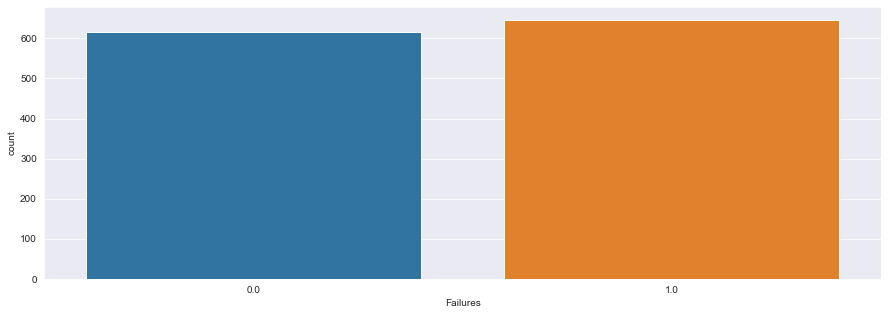

In [21]:
    sns.countplot(x=df["Failures"])
    plt.show()

In [22]:
df['Failures'].value_counts()

1.0    646
0.0    617
Name: Failures, dtype: int64

In [23]:
df['Temp in F'].value_counts()

0.0      130
131.0     35
138.0     29
145.0     26
120.0     26
        ... 
132.0      1
261.0      1
119.0      1
257.0      1
213.8      1
Name: Temp in F, Length: 204, dtype: int64

## EDA, Exploratory Data

In [24]:
failure_mapping = {'NA':0, 'na':0,}

In [25]:
df['Temp in F'] = df['Temp in F'].map(failure_mapping)

In [26]:
df['Temp in F']=df['Temp in F'].astype(int, errors='ignore') 
df['Temp out F']=df['Temp out F'].astype(int, errors='ignore')

In [27]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

df['CUSTOMER']=le.fit_transform(df['CUSTOMER'])
df['LOCATION']=le.fit_transform(df['LOCATION'])
df['RIG']=le.fit_transform(df['RIG'])
# df['Temp in F']=le.fit_transform(df['Temp in F'])
# df['Temp out F']=le.fit_transform(df['Temp out F']).astype(int, errors='str')

df.head()

,JOB #,LOCATION,CUSTOMER,WELL NAME,MWD PERSONNEL,DD PERSONNEL,RIG,Kit Box,Run #,Date in,Date out,Time in,Time out,In hole hrs,Run Circ. Hrs.,Depth In,Depth Out,Total Drilled,ROP,Bit MFG,Bit size,Jets,BHA,BHA SIZE,Motor Make,Bend,GPM,RPM:,SPM:,Pump Press,Temp in F,Temp out F,Mud #,Total correction,Mag Dec,Inc In,Inc Out,Azm In,Azm out,Batt. 2,Interconnect,Elec.,Interconnect.1,Batt. 1,Interconnect.2,Gamma,Interconnect.3,Pulser,Lower end,M/S Sleeve,M/S Sub,Poppet,Orifice,Pulse Ampl,Failures,Failures.1,NPT,Comments,Failure Comments
0,GC-200090,100,30,LARSON HC1 LAS A 1H,P.PEREZ / J. KOLANDA,C. JACKSON / G. HICKM0N,65,25,1,2020-01-15 00:00:00,2020-01-15 00:00:00,15:30:00,17:30:00,2.0,1.0,109,230.0,121.0,121.0,ULTERRA/U6165,12.25,6X18,STEERABLE,0,QES,1.83,600,0,186.0,750,NaN,0,8.5,4.46,Grid,0.0,0.0,0.0,0.0,5377,NextGen,0337 XXT,NextGen,737,NextGen,0,0,6446,L2,1ST,802,1.086,1.50,20.0,1.0,1,2.5,POOH TO CHANGE MWD,NO SURVEY DUE TO RATTY PULSES
1,GC-200076,85,10,Lonesome Dove #10H,Payton / David,Scottie / Jeremy,55,90,3,2020-01-16 00:00:00,2020-01-17 00:00:00,12:00:00,18:00:00,30.0,20.5,12115,14210.0,2095.0,102.0,Baker / DD406S,8.5,6 x 22,CurveLat,7,QES,2,700,90,217.0,6000,NaN,275,12.1,3.1,Grid,43.7,95.6,302.2,313.1,5434,NextGen,329K,NextGen,5355,NextGen,L102 Titan,NextGen,4463,M77,3rd,650-753,1.122,1.35,57.0,1.0,2,15 HRS,MWD Failure,DIP ANGLE BAD - MAGNETICS BAD
2,GC-200104,131,137,San Miguel Ranch EF B #25H,P. DeSoto / B Johnson,D. Kingston / A. Vaughn,35,59,1,2020-01-23 00:00:00,2020-01-24 00:00:00,21:30:00,17:30:00,20.0,11.0,80,5595.0,5515.0,501.0,Ulterra,12.25,6-14s,Surface,8,QES,1.75,900,90,279.0,2360,NaN,129,9.2,3.67,Grid,0.0,4.8,0.0,287.2,5515,NextGen,0595xxt,NextGen,5529,NextGen,1237 CBG,NextGen,2997,M90,2ND,724,1.086,1.50,104.0,1.0,3,0,TD Surface @ 5595',Tool Flatlined After Surface TD
3,GC-200122,114,148,Red Baron Unit #1,Kyle Clark / Brent McKim,TJ Arterberry / Mackey Belgard,41,80,2,2020-01-26 00:00:00,2020-01-30 00:00:00,09:45:00,11:30:00,97.8,82.0,11804,19730.0,7926.0,97.0,Baker / DD506TS,8.5,9 x 18's,Curve / Lateral,7,QES,2,700,105,238.0,6651,NaN,317,12.6,3.52,Grid,1.0,93.3,260.7,320.1,682,NextGen,0177K,NextGen,3030,NextGen,681,NextGen,3122,GC-5,Run 1,650-129,1.125,1.35,42.0,1.0,4,27.5,MWD Failure,Tool Flatlined during a Slide / Pressure increase
4,GC-200001,26,40,G Klein C D-Weisch A ULW C 1,"J.J. Pena-Alfaro, Chris McDaniel",Justin Webb / Danny Bryant,36,63,2,2020-01-05 00:00:00,2019-01-07 00:00:00,15:00:00,14:30:00,47.5,33.5,11449,13081.0,1632.0,49.0,Baker,8.75,6x22's,Steerable,7,QES,2,550,60,170.0,3449,NaN,249,12.9,2.91,Grid,13.2,85.3,309.7,119.9,5464,NextGen,2765K,NextGen,534,NextGen,683Deteq,NextGen,3183,M73,1 Run,650-756,1.125,1.35,80.0,1.0,5,16,Change Out MWD,Tool QC readings on Grav & MagF out of tolerance


In [28]:
# plt.figure(figsize=(6,8))
# x =df.drop(obj, axis =1)
# print(x.columns)
# for i in x.columns:
#     sns.scatterplot(x="Failures", y=i, data=x, color = 'Red')
#     plt.show()

In [29]:
# x=df.drop (obj,axis=1)
# for i in x.columns:
#     sns.violinplot(x=i, data =x, color = 'yellowgreen')
#     plt.xlabel(i)
#     plt.show()

In [30]:
# df.loc[131, "BRT Hours"] = np.nan
# df.loc[131, "BRT Hours"] = df['BRT Hours'].mean()

# df.loc[359, "NPT"] = 1.5

In [31]:
# pd.set_option('display.max_rows',df.shape[0]+1)
# df.isnull().sum()

## classifying catergorical data from Numerical Data

In [32]:
df_num = df.select_dtypes(include=[np.number])
df_obj = df.select_dtypes(exclude=[np.number])

In [33]:
df_obj


,JOB #,WELL NAME,MWD PERSONNEL,DD PERSONNEL,Kit Box,Run #,Date in,Date out,Time in,Time out,Bit MFG,Bit size,Jets,BHA,BHA SIZE,Motor Make,Bend,Temp out F,Total correction,Mag Dec,Batt. 2,Interconnect,Elec.,Interconnect.1,Batt. 1,Interconnect.2,Gamma,Interconnect.3,Pulser,Lower end,M/S Sleeve,M/S Sub,Poppet,Failures.1,NPT,Comments,Failure Comments
0,GC-200090,LARSON HC1 LAS A 1H,P.PEREZ / J. KOLANDA,C. JACKSON / G. HICKM0N,25,1,2020-01-15 00:00:00,2020-01-15 00:00:00,15:30:00,17:30:00,ULTERRA/U6165,12.25,6X18,STEERABLE,0,QES,1.83,0,4.46,Grid,5377,NextGen,0337 XXT,NextGen,737,NextGen,0,0,6446,L2,1ST,802,1.086,1,2.5,POOH TO CHANGE MWD,NO SURVEY DUE TO RATTY PULSES
1,GC-200076,Lonesome Dove #10H,Payton / David,Scottie / Jeremy,90,3,2020-01-16 00:00:00,2020-01-17 00:00:00,12:00:00,18:00:00,Baker / DD406S,8.5,6 x 22,CurveLat,7,QES,2,275,3.1,Grid,5434,NextGen,329K,NextGen,5355,NextGen,L102 Titan,NextGen,4463,M77,3rd,650-753,1.122,2,15 HRS,MWD Failure,DIP ANGLE BAD - MAGNETICS BAD
2,GC-200104,San Miguel Ranch EF B #25H,P. DeSoto / B Johnson,D. Kingston / A. Vaughn,59,1,2020-01-23 00:00:00,2020-01-24 00:00:00,21:30:00,17:30:00,Ulterra,12.25,6-14s,Surface,8,QES,1.75,129,3.67,Grid,5515,NextGen,0595xxt,NextGen,5529,NextGen,1237 CBG,NextGen,2997,M90,2ND,724,1.086,3,0,TD Surface @ 5595',Tool Flatlined After Surface TD
3,GC-200122,Red Baron Unit #1,Kyle Clark / Brent McKim,TJ Arterberry / Mackey Belgard,80,2,2020-01-26 00:00:00,2020-01-30 00:00:00,09:45:00,11:30:00,Baker / DD506TS,8.5,9 x 18's,Curve / Lateral,7,QES,2,317,3.52,Grid,682,NextGen,0177K,NextGen,3030,NextGen,681,NextGen,3122,GC-5,Run 1,650-129,1.125,4,27.5,MWD Failure,Tool Flatlined during a Slide / Pressure increase
4,GC-200001,G Klein C D-Weisch A ULW C 1,"J.J. Pena-Alfaro, Chris McDaniel",Justin Webb / Danny Bryant,63,2,2020-01-05 00:00:00,2019-01-07 00:00:00,15:00:00,14:30:00,Baker,8.75,6x22's,Steerable,7,QES,2,249,2.91,Grid,5464,NextGen,2765K,NextGen,534,NextGen,683Deteq,NextGen,3183,M73,1 Run,650-756,1.125,5,16,Change Out MWD,Tool QC readings on Grav & MagF out of tolerance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,MC-200838,Goff 3-10-15XHW,B. Iguess / A. Culver,Blaine / John Davis,19,2,2020-11-29 00:00:00,2020-12-02 00:00:00,08:00:00,05:30:00,Ulterra / U613M,12.25,"5x14,1x13",Tangent-RSS,9.65,Bico,Straight,154,3.72,Grid,740,NextGen,24X5K,NextGen,5472,NextGen,739Deteq,NextGen,5401,M57,2nd Run,800-807,1.04,115,0,Bit and Motor,Good Run For MWD!!!
1277,MC-200838,Goff 3-10-15XHW,B. Iguess / A. Culver,Blaine / John Davis,19,3,2020-12-02 00:00:00,2020-12-04 00:00:00,08:00:00,07:30:00,Ulterra / U613M,12.25,"5x14,1x13",Tangent-RSS,9,Bico,Straight,156,3.72,Grid,5429,NextGen,0172K,NextGen,5284,NextGen,779Deteq,NextGen,4671,M50,3rd Run,800-807,1.086,115,0,Bit and Motor / ROP,Good Run For MWD!!!
1278,MC-200838,Goff 3-10-15XHW,B. Iguess / A. Culver,Blaine / John Davis,19,4,2020-12-04 00:00:00,2020-12-05 00:00:00,09:00:00,21:30:00,Varel V713P,12.25,"4x12,3x13",Tangent-RSS,9,Bico,Straight,153,3.72,Grid,5429,NextGen,0172K,NextGen,5284,NextGen,779Deteq,NextGen,4671,M50,3rd Run,800-807,1.086,115,0,Bit / ROP,Good Run For MWD!!!
1279,MC-200838,Goff 3-10-15XHW,B. Iguess / A. Culver,Blaine / John Davis,19,5,2020-12-05 00:00:00,2020-12-06 00:00:00,22:15:00,22:00:00,Ulterra / U613M,12.25,"5x14,1x13",Tangent-RSS,9.65,Bico,Straight,163,3.72,Grid,740,NextGen,24X5K,NextGen,5472,NextGen,739Deteq,NextGen,5401,M19,1st Run,800-807,1.04,115,0,TD Vertical Section,Good Run For MWD!!!


In [34]:
df_num

,LOCATION,CUSTOMER,RIG,In hole hrs,Run Circ. Hrs.,Depth In,Depth Out,Total Drilled,ROP,GPM,RPM:,SPM:,Pump Press,Temp in F,Mud #,Inc In,Inc Out,Azm In,Azm out,Orifice,Pulse Ampl,Failures
0,100,30,65,2.0,1.0,109,230.0,121.0,121.0,600,0,186.0,750,NaN,8.50,0.0,0.0,0.0,0.0,1.50,20.0,1.0
1,85,10,55,30.0,20.5,12115,14210.0,2095.0,102.0,700,90,217.0,6000,NaN,12.10,43.7,95.6,302.2,313.1,1.35,57.0,1.0
2,131,137,35,20.0,11.0,80,5595.0,5515.0,501.0,900,90,279.0,2360,NaN,9.20,0.0,4.8,0.0,287.2,1.50,104.0,1.0
3,114,148,41,97.8,82.0,11804,19730.0,7926.0,97.0,700,105,238.0,6651,NaN,12.60,1.0,93.3,260.7,320.1,1.35,42.0,1.0
4,26,40,36,47.5,33.5,11449,13081.0,1632.0,49.0,550,60,170.0,3449,NaN,12.90,13.2,85.3,309.7,119.9,1.35,80.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,70,42,145,69.5,57.5,6594,9726.0,3132.0,54.0,900,40,256.0,4220,NaN,9.80,4.0,3.7,110.2,103.5,1.50,30.0,0.0
1277,70,42,145,47.5,38.0,9728,10736.0,1008.0,27.0,855,75,243.0,4856,NaN,10.05,3.7,4.4,103.5,107.3,1.50,33.0,0.0
1278,70,42,145,36.5,15.5,10736,12369.0,1633.0,105.0,855,37,243.0,4849,NaN,9.80,4.4,3.7,107.3,90.6,1.50,24.0,0.0
1279,70,42,145,23.8,12.0,12369,12876.0,507.0,42.0,834,51,237.0,4900,NaN,10.00,3.7,3.9,103.5,94.2,1.50,18.0,0.0


In [35]:
# pd.set_option('display.max_rows',df.shape[0]+1)
# df.isnull().sum()

In [36]:
def outliers(df, n, features):
    global outlier_indices
    outlier_indices = []
    for col in features:
        
        #1st quartile
        Q1 = np.percentile(df[col], 25)
        
        #3rd quartile
        Q3 = np.percentile(df[col], 75)
        
        #inter quartile range
        IQR = Q3 - Q1
        
        #identify index of outlier rows
        outlierlist = df[(df[col] < (Q1 - (1.5 * IQR))) | (df[col] > (Q3 + (1.5 * IQR)))].index
        
        outlier_indices.extend(outlierlist)
    outlier_indices = Counter(outlier_indices)
    multipleoutliers = list(k for k,v in outlier_indices.items() if v > n)
        
    return multipleoutliers
#detect outliers from Age, SibSp, Fare and Parch
finaloutliers = outliers(df_num, 2, df_num.columns)

##  replacing Null values with mean values

In [37]:
for i in is_null:
    if df[i].dtype == "int64" or df[i].dtype == "float64":
        if i in outlier_indices:
            df[i]. fillna(df[i].median(), inplace =True)
        else:
            df[i].fillna(df[i].mean(), inplace=True)
    elif df[i].dtype == "object":
        df[i].fillna(df[i].mode()[0], inplace =True)

In [38]:
df_num = df.select_dtypes(include=[np.number])
df_obj = df.select_dtypes(exclude=[np.number])

In [39]:
df_obj

,JOB #,WELL NAME,MWD PERSONNEL,DD PERSONNEL,Kit Box,Run #,Date in,Date out,Time in,Time out,Bit MFG,Bit size,Jets,BHA,BHA SIZE,Motor Make,Bend,Temp out F,Total correction,Mag Dec,Batt. 2,Interconnect,Elec.,Interconnect.1,Batt. 1,Interconnect.2,Gamma,Interconnect.3,Pulser,Lower end,M/S Sleeve,M/S Sub,Poppet,Failures.1,NPT,Comments,Failure Comments
0,GC-200090,LARSON HC1 LAS A 1H,P.PEREZ / J. KOLANDA,C. JACKSON / G. HICKM0N,25,1,2020-01-15 00:00:00,2020-01-15 00:00:00,15:30:00,17:30:00,ULTERRA/U6165,12.25,6X18,STEERABLE,0,QES,1.83,0,4.46,Grid,5377,NextGen,0337 XXT,NextGen,737,NextGen,0,0,6446,L2,1ST,802,1.086,1,2.5,POOH TO CHANGE MWD,NO SURVEY DUE TO RATTY PULSES
1,GC-200076,Lonesome Dove #10H,Payton / David,Scottie / Jeremy,90,3,2020-01-16 00:00:00,2020-01-17 00:00:00,12:00:00,18:00:00,Baker / DD406S,8.5,6 x 22,CurveLat,7,QES,2,275,3.1,Grid,5434,NextGen,329K,NextGen,5355,NextGen,L102 Titan,NextGen,4463,M77,3rd,650-753,1.122,2,15 HRS,MWD Failure,DIP ANGLE BAD - MAGNETICS BAD
2,GC-200104,San Miguel Ranch EF B #25H,P. DeSoto / B Johnson,D. Kingston / A. Vaughn,59,1,2020-01-23 00:00:00,2020-01-24 00:00:00,21:30:00,17:30:00,Ulterra,12.25,6-14s,Surface,8,QES,1.75,129,3.67,Grid,5515,NextGen,0595xxt,NextGen,5529,NextGen,1237 CBG,NextGen,2997,M90,2ND,724,1.086,3,0,TD Surface @ 5595',Tool Flatlined After Surface TD
3,GC-200122,Red Baron Unit #1,Kyle Clark / Brent McKim,TJ Arterberry / Mackey Belgard,80,2,2020-01-26 00:00:00,2020-01-30 00:00:00,09:45:00,11:30:00,Baker / DD506TS,8.5,9 x 18's,Curve / Lateral,7,QES,2,317,3.52,Grid,682,NextGen,0177K,NextGen,3030,NextGen,681,NextGen,3122,GC-5,Run 1,650-129,1.125,4,27.5,MWD Failure,Tool Flatlined during a Slide / Pressure increase
4,GC-200001,G Klein C D-Weisch A ULW C 1,"J.J. Pena-Alfaro, Chris McDaniel",Justin Webb / Danny Bryant,63,2,2020-01-05 00:00:00,2019-01-07 00:00:00,15:00:00,14:30:00,Baker,8.75,6x22's,Steerable,7,QES,2,249,2.91,Grid,5464,NextGen,2765K,NextGen,534,NextGen,683Deteq,NextGen,3183,M73,1 Run,650-756,1.125,5,16,Change Out MWD,Tool QC readings on Grav & MagF out of tolerance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,MC-200838,Goff 3-10-15XHW,B. Iguess / A. Culver,Blaine / John Davis,19,2,2020-11-29 00:00:00,2020-12-02 00:00:00,08:00:00,05:30:00,Ulterra / U613M,12.25,"5x14,1x13",Tangent-RSS,9.65,Bico,Straight,154,3.72,Grid,740,NextGen,24X5K,NextGen,5472,NextGen,739Deteq,NextGen,5401,M57,2nd Run,800-807,1.04,115,0,Bit and Motor,Good Run For MWD!!!
1277,MC-200838,Goff 3-10-15XHW,B. Iguess / A. Culver,Blaine / John Davis,19,3,2020-12-02 00:00:00,2020-12-04 00:00:00,08:00:00,07:30:00,Ulterra / U613M,12.25,"5x14,1x13",Tangent-RSS,9,Bico,Straight,156,3.72,Grid,5429,NextGen,0172K,NextGen,5284,NextGen,779Deteq,NextGen,4671,M50,3rd Run,800-807,1.086,115,0,Bit and Motor / ROP,Good Run For MWD!!!
1278,MC-200838,Goff 3-10-15XHW,B. Iguess / A. Culver,Blaine / John Davis,19,4,2020-12-04 00:00:00,2020-12-05 00:00:00,09:00:00,21:30:00,Varel V713P,12.25,"4x12,3x13",Tangent-RSS,9,Bico,Straight,153,3.72,Grid,5429,NextGen,0172K,NextGen,5284,NextGen,779Deteq,NextGen,4671,M50,3rd Run,800-807,1.086,115,0,Bit / ROP,Good Run For MWD!!!
1279,MC-200838,Goff 3-10-15XHW,B. Iguess / A. Culver,Blaine / John Davis,19,5,2020-12-05 00:00:00,2020-12-06 00:00:00,22:15:00,22:00:00,Ulterra / U613M,12.25,"5x14,1x13",Tangent-RSS,9.65,Bico,Straight,163,3.72,Grid,740,NextGen,24X5K,NextGen,5472,NextGen,739Deteq,NextGen,5401,M19,1st Run,800-807,1.04,115,0,TD Vertical Section,Good Run For MWD!!!


In [40]:
df_num

,LOCATION,CUSTOMER,RIG,In hole hrs,Run Circ. Hrs.,Depth In,Depth Out,Total Drilled,ROP,GPM,RPM:,SPM:,Pump Press,Temp in F,Mud #,Inc In,Inc Out,Azm In,Azm out,Orifice,Pulse Ampl,Failures
0,100,30,65,2.0,1.0,109,230.0,121.0,121.0,600,0,186.0,750,NaN,8.50,0.0,0.0,0.0,0.0,1.50,20.0,1.0
1,85,10,55,30.0,20.5,12115,14210.0,2095.0,102.0,700,90,217.0,6000,NaN,12.10,43.7,95.6,302.2,313.1,1.35,57.0,1.0
2,131,137,35,20.0,11.0,80,5595.0,5515.0,501.0,900,90,279.0,2360,NaN,9.20,0.0,4.8,0.0,287.2,1.50,104.0,1.0
3,114,148,41,97.8,82.0,11804,19730.0,7926.0,97.0,700,105,238.0,6651,NaN,12.60,1.0,93.3,260.7,320.1,1.35,42.0,1.0
4,26,40,36,47.5,33.5,11449,13081.0,1632.0,49.0,550,60,170.0,3449,NaN,12.90,13.2,85.3,309.7,119.9,1.35,80.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,70,42,145,69.5,57.5,6594,9726.0,3132.0,54.0,900,40,256.0,4220,NaN,9.80,4.0,3.7,110.2,103.5,1.50,30.0,0.0
1277,70,42,145,47.5,38.0,9728,10736.0,1008.0,27.0,855,75,243.0,4856,NaN,10.05,3.7,4.4,103.5,107.3,1.50,33.0,0.0
1278,70,42,145,36.5,15.5,10736,12369.0,1633.0,105.0,855,37,243.0,4849,NaN,9.80,4.4,3.7,107.3,90.6,1.50,24.0,0.0
1279,70,42,145,23.8,12.0,12369,12876.0,507.0,42.0,834,51,237.0,4900,NaN,10.00,3.7,3.9,103.5,94.2,1.50,18.0,0.0


In [41]:
normalized_df=(df_num-df_num.mean())/df_num.std()

In [42]:
normalized_df

,LOCATION,CUSTOMER,RIG,In hole hrs,Run Circ. Hrs.,Depth In,Depth Out,Total Drilled,ROP,GPM,RPM:,SPM:,Pump Press,Temp in F,Mud #,Inc In,Inc Out,Azm In,Azm out,Orifice,Pulse Ampl,Failures
0,-0.283914,-1.132861,-0.619006,0.024743,-1.031516,-1.603560,-1.988159,-0.887486,0.373200,0.231972,-1.215889,0.258071,-1.583371,NaN,-0.045872,-0.784866,-1.146925,-1.404083,-1.826291,0.921931,-0.869114,0.983852
1,-0.546509,-1.605778,-0.794232,0.025715,-0.475284,0.782121,0.621019,-0.209425,0.200535,0.566001,0.477350,0.576978,1.522321,NaN,-0.011582,0.335093,1.138224,0.804564,1.081760,-0.034631,-0.142414,0.983852
2,0.258782,1.397248,-1.144682,0.025368,-0.746269,-1.609323,-0.986855,0.965332,3.826485,1.234060,0.477350,1.214792,-0.630959,NaN,-0.039204,-0.784866,-1.032190,-1.404083,0.841202,0.921931,0.780691,0.983852
3,-0.038826,1.657352,-1.039547,0.028068,1.278987,0.720323,1.651252,1.793501,0.155097,0.566001,0.759556,0.793012,1.907427,NaN,-0.006819,-0.759237,1.083246,0.501258,1.146775,-0.034631,-0.437022,0.983852
4,-1.579383,-0.896402,-1.127160,0.026322,-0.104462,0.649782,0.410306,-0.368464,-0.281107,0.064957,-0.087063,0.093474,0.013250,NaN,-0.003961,-0.446572,0.892021,0.859378,-0.712668,-0.034631,0.309319,0.983852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,-0.809104,-0.849110,0.782796,0.027086,0.580131,-0.314943,-0.215859,0.146780,-0.235669,1.234060,-0.463338,0.978183,0.469343,NaN,-0.033489,-0.682352,-1.058483,-0.598680,-0.864990,0.921931,-0.672708,-1.030094
1277,-0.809104,-0.849110,0.782796,0.026322,0.023899,0.307806,-0.027356,-0.582805,-0.481034,1.083746,0.195143,0.844448,0.845576,NaN,-0.031108,-0.690041,-1.041751,-0.647647,-0.829696,0.921931,-0.613787,-1.030094
1278,-0.809104,-0.849110,0.782796,0.025941,-0.617907,0.508103,0.277421,-0.368120,0.227798,1.083746,-0.519780,0.844448,0.841435,NaN,-0.033489,-0.672101,-1.058483,-0.619875,-0.984805,0.921931,-0.790551,-1.030094
1279,-0.809104,-0.849110,0.782796,0.025500,-0.717744,0.832592,0.372046,-0.754897,-0.344720,1.013600,-0.256387,0.782724,0.871604,NaN,-0.031584,-0.690041,-1.053703,-0.647647,-0.951368,0.921931,-0.908395,-1.030094


In [43]:
from sklearn.utils import shuffle
normalized_df = shuffle(normalized_df)

In [44]:
normalized_df.isnull().sum()

LOCATION             0
CUSTOMER             0
RIG                  0
In hole hrs          0
Run Circ. Hrs.       0
Depth In             0
Depth Out            0
Total Drilled        0
ROP                  0
GPM                  0
RPM:                 0
SPM:                 0
Pump Press           0
Temp in F         1281
Mud #                0
Inc In               0
Inc Out              0
Azm In               0
Azm out              0
Orifice              0
Pulse Ampl           0
Failures             0
dtype: int64

In [45]:

df['Failures']=df['Failures'].astype(int) 

<AxesSubplot:>

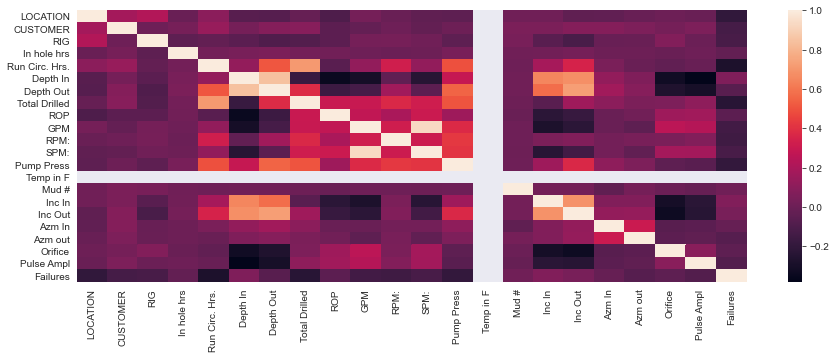

In [46]:
sns.heatmap(normalized_df.corr())

In [47]:
X = normalized_df.drop(labels=['Failures', 'Temp in F'], axis=1)
y = normalized_df['Failures']

In [48]:
X

,LOCATION,CUSTOMER,RIG,In hole hrs,Run Circ. Hrs.,Depth In,Depth Out,Total Drilled,ROP,GPM,RPM:,SPM:,Pump Press,Mud #,Inc In,Inc Out,Azm In,Azm out,Orifice,Pulse Ampl
29,0.363820,0.971622,0.642616,0.025559,-0.760531,0.246207,-0.116942,-0.641200,0.000608,-0.596421,-0.087063,-0.626638,0.173563,-0.039681,1.539624,0.961340,-0.187208,-0.298427,-0.672338,1.566313
578,-0.458978,-0.565360,0.467391,0.026513,-0.047413,0.462599,0.825572,0.719388,0.500426,0.562661,0.289212,0.813586,1.448376,-0.020154,-0.733609,1.099979,1.220421,1.516435,0.284223,-0.260257
1261,-0.826611,-0.565360,-1.092115,0.026010,-0.147249,-1.071025,-0.148110,1.578472,1.345572,-0.095377,0.665487,0.103761,-0.048272,-0.031584,-0.620844,-1.106290,0.096364,1.087333,-0.034631,1.310986
9,-0.896636,-0.565360,0.712706,0.029810,2.705222,0.506911,1.498583,1.881436,-0.162968,0.566001,0.665487,0.793012,1.581477,-0.027774,-0.769489,0.853775,-1.279838,-0.559417,-0.034631,-0.024571
987,-0.371446,-1.132861,-0.986980,0.025507,-0.689219,0.495187,0.059243,-0.747340,-0.353808,-0.269072,0.007006,-0.564914,0.102576,-0.045872,1.516559,1.018708,1.217497,1.487642,-0.672338,0.191475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,0.941529,-1.298382,0.887931,0.028890,1.721120,1.374865,1.180182,-0.204960,-0.526472,0.031554,0.383281,-0.204858,1.451925,-0.008724,1.472991,1.002453,-1.322812,-1.701833,-0.034631,-1.163722
1218,-0.529003,1.633707,-0.251033,0.027572,0.637180,0.576061,1.451364,1.674994,0.427725,0.549300,0.383281,0.803299,0.901182,-0.021107,-0.774614,1.092808,0.933194,1.289810,-0.034631,0.643208
109,-0.529003,1.633707,-0.251033,0.025542,-0.461021,-1.604355,-0.980322,0.968767,1.663638,1.220698,0.571418,1.513124,-0.193204,-0.037299,-0.769489,-1.089558,1.172915,0.052657,0.284223,2.273372
1045,0.696440,0.735163,1.396085,0.026513,-0.118725,0.864982,0.852075,0.072585,0.073309,-0.679928,0.308026,-0.503190,1.489785,-0.017297,0.668261,1.047392,-0.043229,-0.030005,-0.672338,1.507391


## Spliting  Data to train and test for Prediction, importing library to model the data. 

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [50]:
print(X.shape)
print(y.shape)

(1281, 20)
(1281,)


In [51]:
y=y.astype(int)
y

29      0
578     0
1261   -1
9       0
987    -1
       ..
730    -1
1218   -1
109     0
1045   -1
261     0
Name: Failures, Length: 1281, dtype: int32

## Split the data 70 percent testing and 30 percent testing 

In [52]:
# Train and val split

from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state=42)

In [53]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((896, 20), (896,), (385, 20), (385,))

## Modeling the data 

In [54]:
print("train sample size",X_train.shape,type(X_train))
print("test sample size",X_val.shape,type(X_val))

train sample size (896, 20) <class 'pandas.core.frame.DataFrame'>
test sample size (385, 20) <class 'pandas.core.frame.DataFrame'>


In [55]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

clf = SVC(kernel = 'linear').fit(X_train,y_train)
clf.predict(X_train)
y_pred = clf.predict(X_val)
y_training = clf.predict(X_train)

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_val, y_val)))
acc_svc = round(clf.score(X_val, y_val) * 100, 2)

cm = confusion_matrix(y_val, y_pred)

Training set score: 0.6741
Test set score: 0.6442


In [56]:
print("y_test sample size",y_val.shape,type(y_val))
print("y_pred sample size",y_pred.shape,type(y_pred))

y_test sample size (385,) <class 'pandas.core.series.Series'>
y_pred sample size (385,) <class 'numpy.ndarray'>


In [57]:
print(acc_svc)
print(cm)

64.42
[[122  73]
 [ 64 126]]


In [58]:
print(acc_svc)
print(cm)

64.42
[[122  73]
 [ 64 126]]


## This is just to visual of the confusion matrix

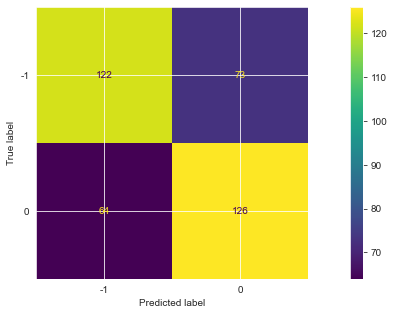

In [59]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_val, y_val)  
plt.show()

In [60]:
# Support Vector Machines

svc = SVC(kernel = 'linear').fit(X_train,y_train)
svc.fit(X_train, y_train)
svc.predict(X_train)
y_pred = svc.predict(X_val)
y_training = svc.predict(X_train)

print('Training set score: {:.4f}'.format(svc.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(svc.score(X_val, y_val)))
acc_svc = round(svc.score(X_val, y_val) * 100, 2)
acc_svc

cm = confusion_matrix(y_val, y_pred)

Training set score: 0.6741
Test set score: 0.6442


In [61]:
print(acc_svc)
print(cm)

64.42
[[122  73]
 [ 64 126]]


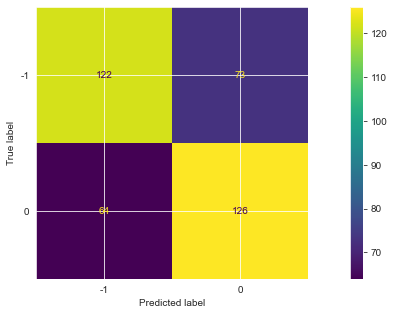

In [62]:
plot_confusion_matrix(svc, X_val, y_val)  
plt.show()

In [63]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_val)
y_training = logreg.predict(X_train)

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_val, y_val)))
acc_log = round(logreg.score(X_val, y_val) * 100, 2)
acc_log

cm = confusion_matrix(y_val, y_pred)

Training set score: 0.6708
Test set score: 0.6416


In [64]:
print(acc_log)
print(cm)

64.16
[[116  79]
 [ 59 131]]


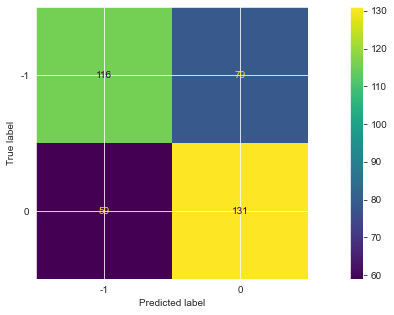

In [65]:
plot_confusion_matrix(logreg, X_val, y_val)  
plt.show()

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)
y_training = knn.predict(X_train)

print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_val, y_val)))
acc_knn = round(knn.score(X_val, y_val) * 100, 2)
acc_knn

cm = confusion_matrix(y_val, y_pred)

Training set score: 0.8661
Test set score: 0.7273


In [68]:
print(acc_knn)
print(cm)

72.73
[[145  50]
 [ 55 135]]


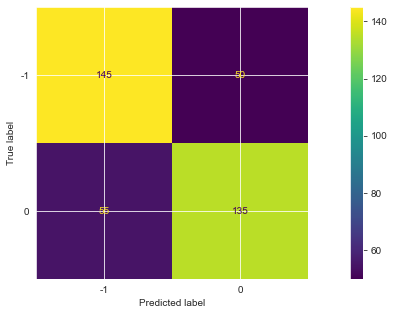

In [69]:
plot_confusion_matrix(knn, X_val, y_val)  
plt.show()

In [70]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=None,min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None,bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False,class_weight=None)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_val)
y_training = random_forest.predict(X_train)
random_forest.score(X_train, y_train)

print('Training set score: {:.4f}'.format(random_forest.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(random_forest.score(X_val, y_val)))
acc_random_forest = round(random_forest.score(X_val, y_val) * 100, 2)
acc_random_forest

cm = confusion_matrix(y_val, y_pred)

Training set score: 1.0000
Test set score: 0.7299


In [71]:
print(acc_random_forest)
print(cm)

72.99
[[143  52]
 [ 52 138]]


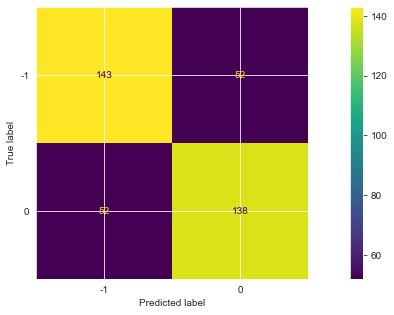

In [72]:
plot_confusion_matrix(random_forest, X_val, y_val)  
plt.show()

In [73]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_val)
Y_training = gaussian.predict(X_train)

print('Training set score: {:.4f}'.format(gaussian.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gaussian.score(X_val, y_val)))
acc_gaussian = round(gaussian.score(X_val, y_val) * 100, 2)
acc_gaussian

Training set score: 0.5949
Test set score: 0.5948


59.48

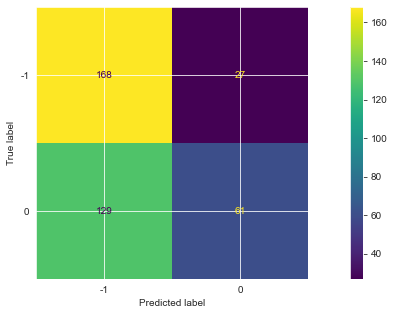

In [74]:
plot_confusion_matrix(gaussian, X_val, y_val)  
plt.show()

In [75]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_val)
Y_training = perceptron.predict(X_train)
print('Training set score: {:.4f}'.format(perceptron.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(perceptron.score(X_val, y_val)))

acc_perceptron = round(perceptron.score(X_val, y_val) * 100, 2)
acc_perceptron

Training set score: 0.5915
Test set score: 0.5636


56.36

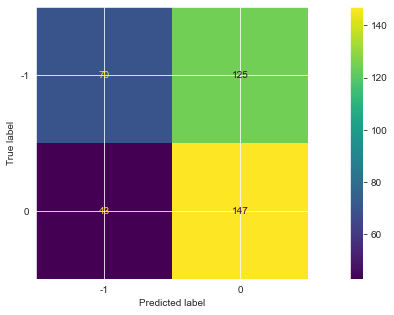

In [76]:
plot_confusion_matrix(perceptron, X_val, y_val)  
plt.show()

In [77]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_val)

print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(linear_svc.score(X_val, y_val)))
acc_linear_svc = round(linear_svc.score(X_val, y_val) * 100, 2)
acc_linear_svc

Training set score: 0.6708
Test set score: 0.6390


C:\Users\adeni\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


63.9

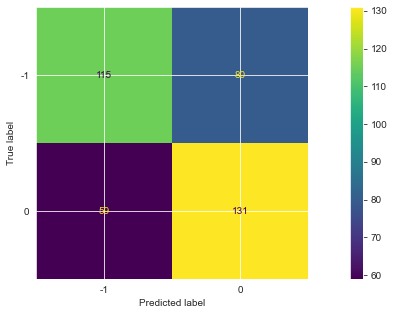

In [78]:
plot_confusion_matrix(linear_svc, X_val, y_val)  
plt.show()

In [79]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_val)
Y_training = sgd.predict(X_train)

print('Training set score: {:.4f}'.format(sgd.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(sgd.score(X_val, y_val)))
acc_sgd = round(sgd.score(X_val, y_val) * 100, 2)


Training set score: 0.6105
Test set score: 0.5870


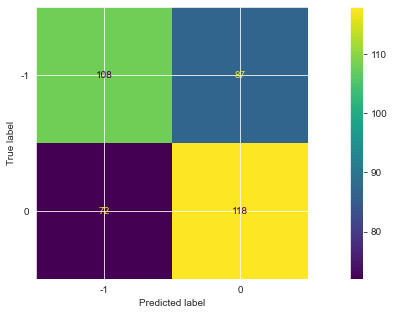

In [80]:
plot_confusion_matrix(sgd, X_val, y_val)  
plt.show()

In [81]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_val)

print('Training set score: {:.4f}'.format(decision_tree.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(decision_tree.score(X_val, y_val)))
acc_decision_tree = round(decision_tree.score(X_val, y_val) * 100, 2)
acc_decision_tree

Training set score: 1.0000
Test set score: 0.7065


70.65

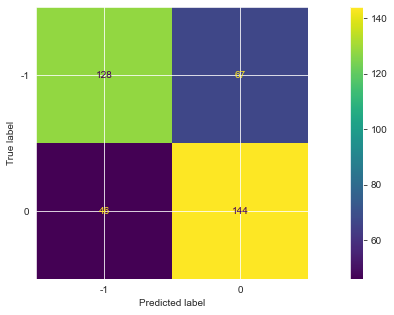

In [82]:
plot_confusion_matrix(decision_tree, X_val, y_val)  
plt.show()

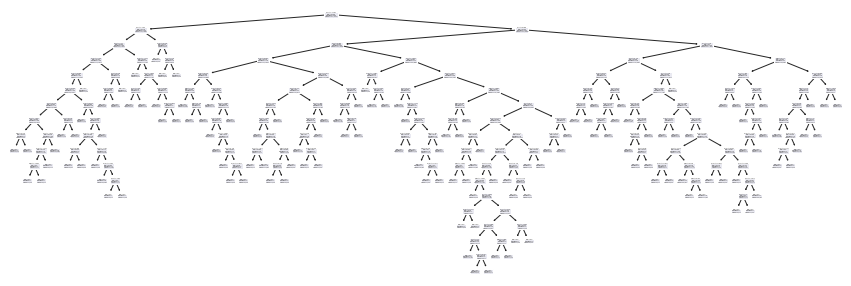

In [83]:
from sklearn import tree 
tree.plot_tree(decision_tree)
plt.show()

In [84]:
len(df.columns)

59

In [85]:
# fig, ax = plt.subplots(figsize=(10,10))
# out = tree.plot_tree(decision_tree, filled=True, rounded=True,
#                     feature_names = [])

In [86]:
decision_tree = DecisionTreeClassifier(criterion = 'gini', random_state=0)
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_val)
Y_training = decision_tree.predict(X_train)

print('Training set score: {:.4f}'.format(decision_tree.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(decision_tree.score(X_val, y_val)))
acc_decision_tree = round(decision_tree.score(X_val, y_val) * 100, 2)

Training set score: 1.0000
Test set score: 0.7143


### Deep Learning with Keras 

In [87]:
#df_num

,LOCATION,CUSTOMER,RIG,In hole hrs,Run Circ. Hrs.,Depth In,Depth Out,Total Drilled,ROP,GPM,RPM:,SPM:,Pump Press,Temp in F,Mud #,Inc In,Inc Out,Azm In,Azm out,Orifice,Pulse Ampl,Failures
0,100,30,65,2.0,1.0,109,230.0,121.0,121.0,600,0,186.0,750,NaN,8.50,0.0,0.0,0.0,0.0,1.50,20.0,1.0
1,85,10,55,30.0,20.5,12115,14210.0,2095.0,102.0,700,90,217.0,6000,NaN,12.10,43.7,95.6,302.2,313.1,1.35,57.0,1.0
2,131,137,35,20.0,11.0,80,5595.0,5515.0,501.0,900,90,279.0,2360,NaN,9.20,0.0,4.8,0.0,287.2,1.50,104.0,1.0
3,114,148,41,97.8,82.0,11804,19730.0,7926.0,97.0,700,105,238.0,6651,NaN,12.60,1.0,93.3,260.7,320.1,1.35,42.0,1.0
4,26,40,36,47.5,33.5,11449,13081.0,1632.0,49.0,550,60,170.0,3449,NaN,12.90,13.2,85.3,309.7,119.9,1.35,80.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,70,42,145,69.5,57.5,6594,9726.0,3132.0,54.0,900,40,256.0,4220,NaN,9.80,4.0,3.7,110.2,103.5,1.50,30.0,0.0
1277,70,42,145,47.5,38.0,9728,10736.0,1008.0,27.0,855,75,243.0,4856,NaN,10.05,3.7,4.4,103.5,107.3,1.50,33.0,0.0
1278,70,42,145,36.5,15.5,10736,12369.0,1633.0,105.0,855,37,243.0,4849,NaN,9.80,4.4,3.7,107.3,90.6,1.50,24.0,0.0
1279,70,42,145,23.8,12.0,12369,12876.0,507.0,42.0,834,51,237.0,4900,NaN,10.00,3.7,3.9,103.5,94.2,1.50,18.0,0.0


In [88]:
df_num = df_num.values

In [89]:
df_num

array([[100.  ,  30.  ,  65.  , ...,   1.5 ,  20.  ,   1.  ],
       [ 85.  ,  10.  ,  55.  , ...,   1.35,  57.  ,   1.  ],
       [131.  , 137.  ,  35.  , ...,   1.5 , 104.  ,   1.  ],
       ...,
       [ 70.  ,  42.  , 145.  , ...,   1.5 ,  24.  ,   0.  ],
       [ 70.  ,  42.  , 145.  , ...,   1.5 ,  18.  ,   0.  ],
       [ 70.  ,  42.  , 145.  , ...,   1.4 ,  24.  ,   0.  ]])

In [90]:
X=df_num[:,0:21]

In [91]:
X

array([[100.  ,  30.  ,  65.  , ...,   0.  ,   1.5 ,  20.  ],
       [ 85.  ,  10.  ,  55.  , ..., 313.1 ,   1.35,  57.  ],
       [131.  , 137.  ,  35.  , ..., 287.2 ,   1.5 , 104.  ],
       ...,
       [ 70.  ,  42.  , 145.  , ...,  90.6 ,   1.5 ,  24.  ],
       [ 70.  ,  42.  , 145.  , ...,  94.2 ,   1.5 ,  18.  ],
       [ 70.  ,  42.  , 145.  , ..., 102.3 ,   1.4 ,  24.  ]])

In [92]:
y=df_num[:,21]

In [93]:
y

array([1., 1., 1., ..., 0., 0., 0.])

In [94]:
from sklearn import preprocessing

In [95]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

C:\Users\adeni\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:400: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\adeni\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:401: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [96]:
X_scale

array([[0.4587156 , 0.1863354 , 0.32338308, ..., 0.        , 0.42857143,
        0.03333333],
       [0.38990826, 0.0621118 , 0.27363184, ..., 0.86996388, 0.38571429,
        0.095     ],
       [0.60091743, 0.85093168, 0.17412935, ..., 0.79799944, 0.42857143,
        0.17333333],
       ...,
       [0.32110092, 0.26086957, 0.72139303, ..., 0.25173659, 0.42857143,
        0.04      ],
       [0.32110092, 0.26086957, 0.72139303, ..., 0.26173937, 0.42857143,
        0.03      ],
       [0.32110092, 0.26086957, 0.72139303, ..., 0.28424562, 0.4       ,
        0.04      ]])

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [98]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(896, 21) (192, 21) (193, 21) (896,) (192,) (193,)


In [99]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(21,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

# model = Sequential()
# model.add(Dense(32, input_dim=20, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1, activation='linear'))

# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# # fit the keras model on the dataset
# model.fit(X, y, epochs=10, batch_size=10)

# accuracy = model.evaluate(X, y)
# print('Accuracy: %.2f',(accuracy*100))

ModuleNotFoundError: No module named 'keras'

In [ ]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=10,
          validation_data=(X_val, Y_val))

In [ ]:
model.evaluate(X_test, Y_test)[1]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
df_num

## This the correlation of the features (Very Important) 

In [100]:
coeff_df = pd.DataFrame(normalized_df.columns.delete(21))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
15,Inc In,0.385017
7,Total Drilled,0.173081
14,Mud #,0.081455
13,Temp in F,0.055960
18,Azm out,0.050731
10,RPM:,0.026680
8,ROP,-0.037991
12,Pump Press,-0.052590
3,In hole hrs,-0.054341
19,Orifice,-0.071892


## Model evaluation

In [101]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,72.99
1,KNN,72.73
8,Decision Tree,71.43
0,Support Vector Machines,64.42
2,Logistic Regression,64.16
7,Linear SVC,63.90
4,Naive Bayes,59.48
6,Stochastic Gradient Decent,58.70
5,Perceptron,56.36


## Export the numerical Data to be further explored in the Spotfire 

In [ ]:
df_num.to_excel(r'2018_MWD_summary.xlsx', index = False)